<a href="https://colab.research.google.com/github/jyj1206/SoloDeepLearning/blob/main/Chapter2_Regression_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pytorch 불러오기
import torch
print(torch.__version__)

2.4.1+cu121


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터셋 정의
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1, x2]).T
y = 2 * np.sin(x1) + np.log(0.5 * x2 ** 2) + e

In [4]:
# 데이터셋 split
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

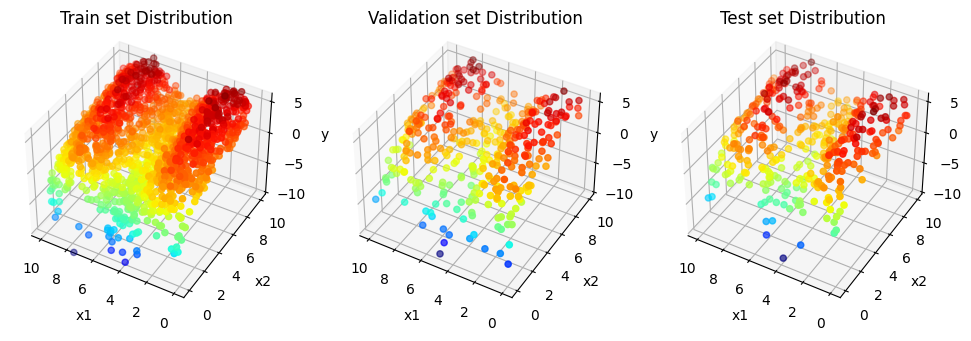

In [5]:
# 시각화
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:,0], val_X[:,1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:,0], test_X[:,1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

In [6]:
## Hypothesis 정의
# LinearModel 정의
import torch.nn as nn
class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear = nn.Linear(in_features=2, out_features=1, bias=True)

  def forward(self, x):
    return self.linear(x)

In [7]:
# MLPModel 정의
class MLPModel(nn.Module):
	def __init__(self):
		super(MLPModel, self).__init__()
		self.linear1 = nn.Linear(in_features=2, out_features=200)
		self.linear2 = nn.Linear(in_features=200, out_features=1)
		self.relu = nn.ReLU()

	def forward(self, x):
		x = self.linear1(x)
		x = self.relu(x)
		x = self.linear2(x)
		return x

In [8]:
# cost function 정의
reg_loss = nn.MSELoss()

# 확인
test_pred_y = torch.Tensor([0, 0, 0, 0])
test_true_y = torch.Tensor([0, 1, 0, 1])

print(reg_loss(test_pred_y, test_true_y))
print(reg_loss(test_true_y, test_true_y))

tensor(0.5000)
tensor(0.)


801 Parameters


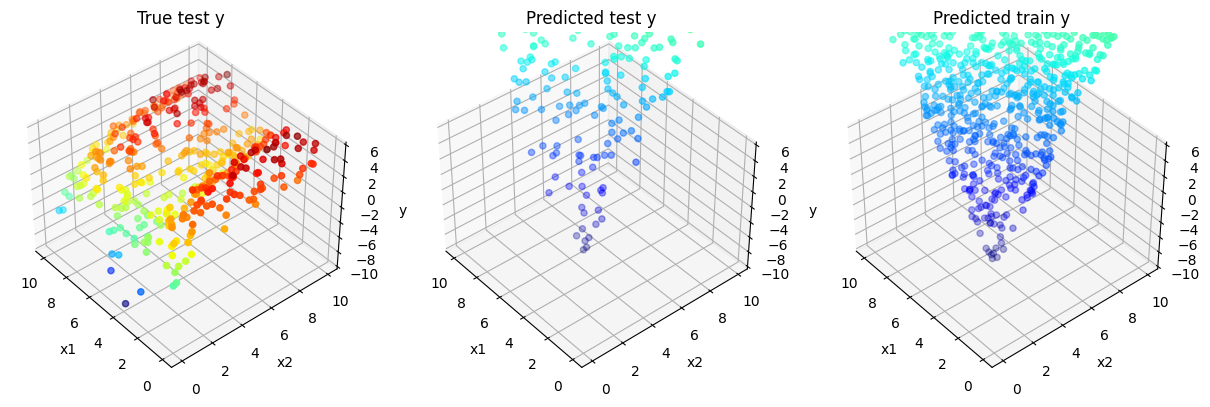

0 tensor(538.1943, grad_fn=<MseLossBackward0>)


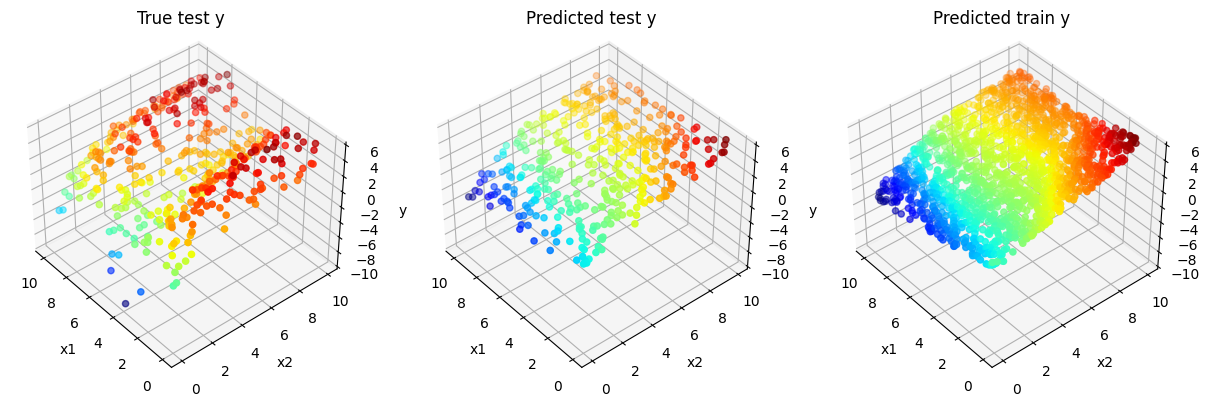

200 tensor(2.7616, grad_fn=<MseLossBackward0>)


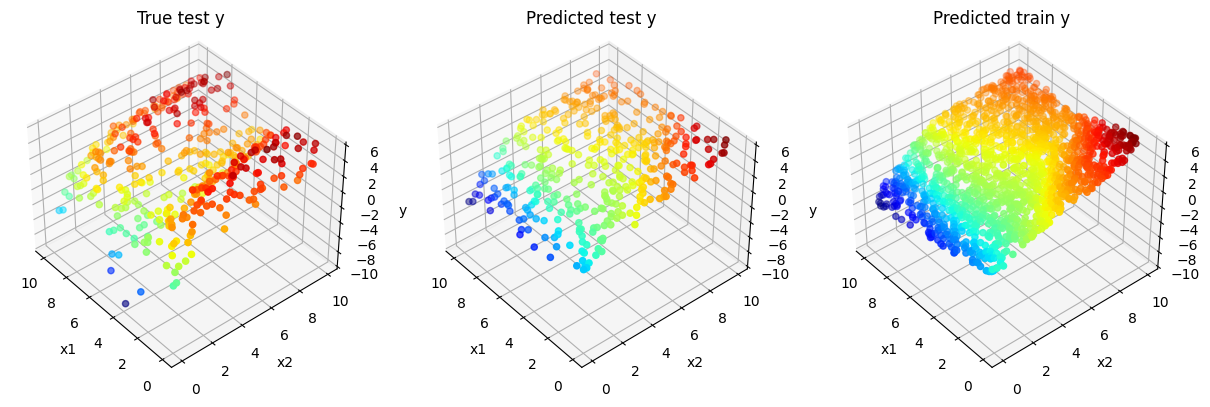

400 tensor(2.3562, grad_fn=<MseLossBackward0>)


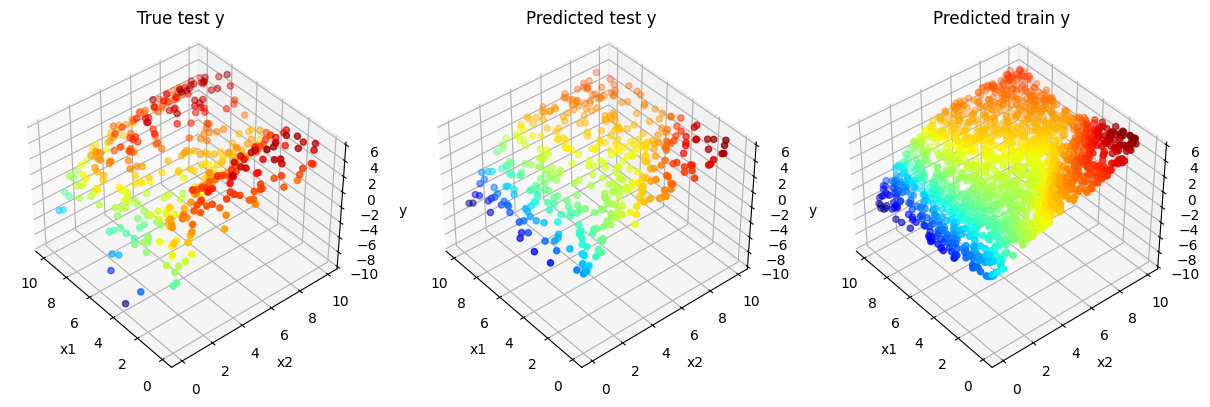

600 tensor(2.1252, grad_fn=<MseLossBackward0>)


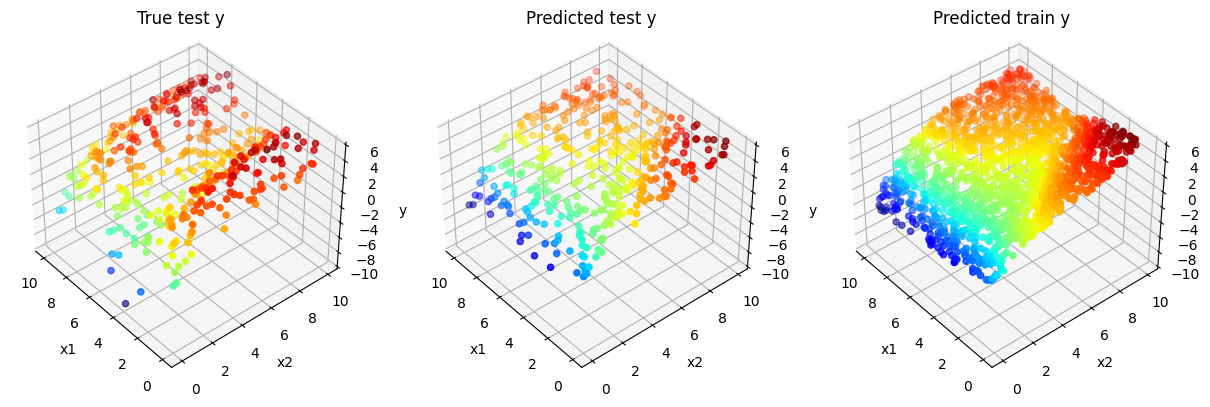

800 tensor(1.9731, grad_fn=<MseLossBackward0>)


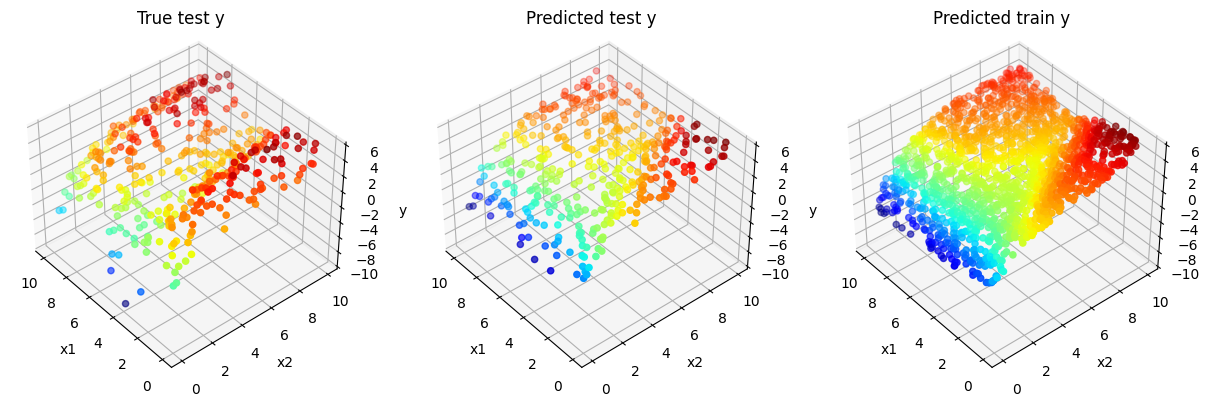

1000 tensor(1.8514, grad_fn=<MseLossBackward0>)


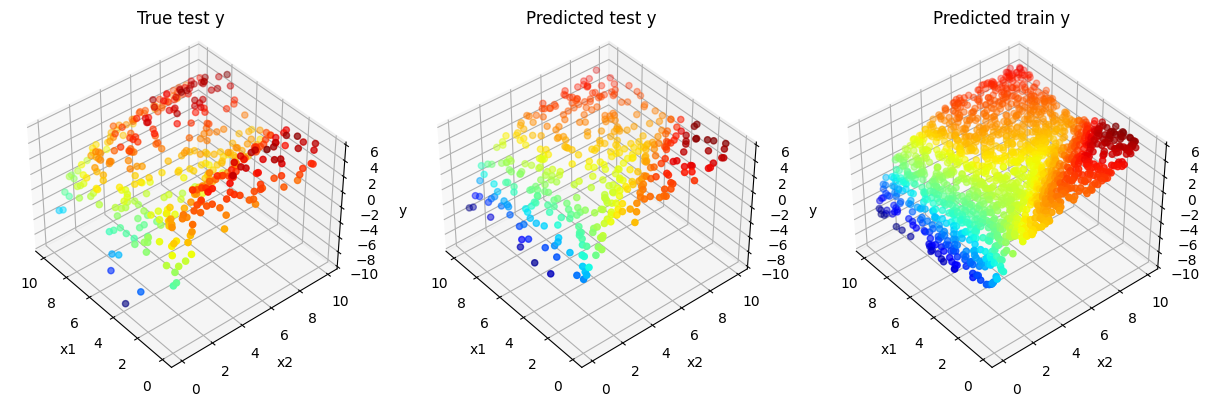

1200 tensor(1.7466, grad_fn=<MseLossBackward0>)


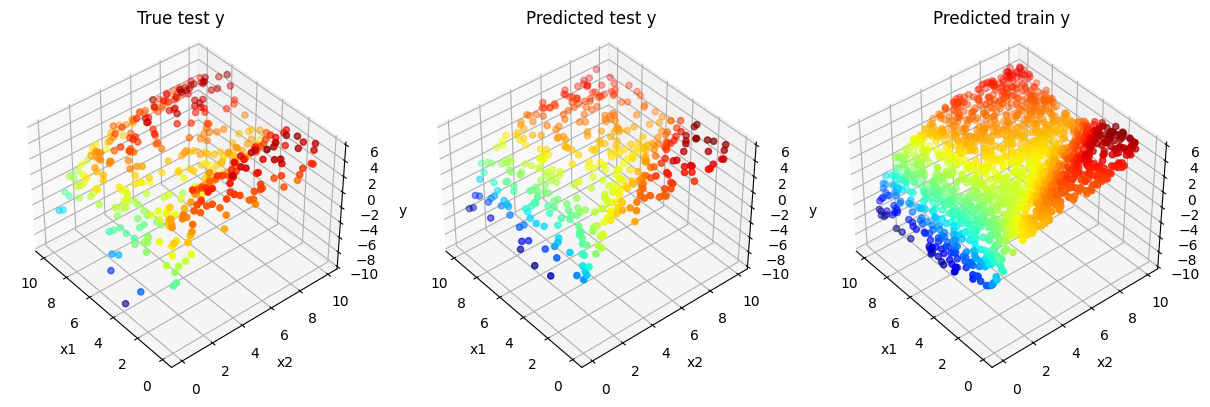

1400 tensor(1.6586, grad_fn=<MseLossBackward0>)


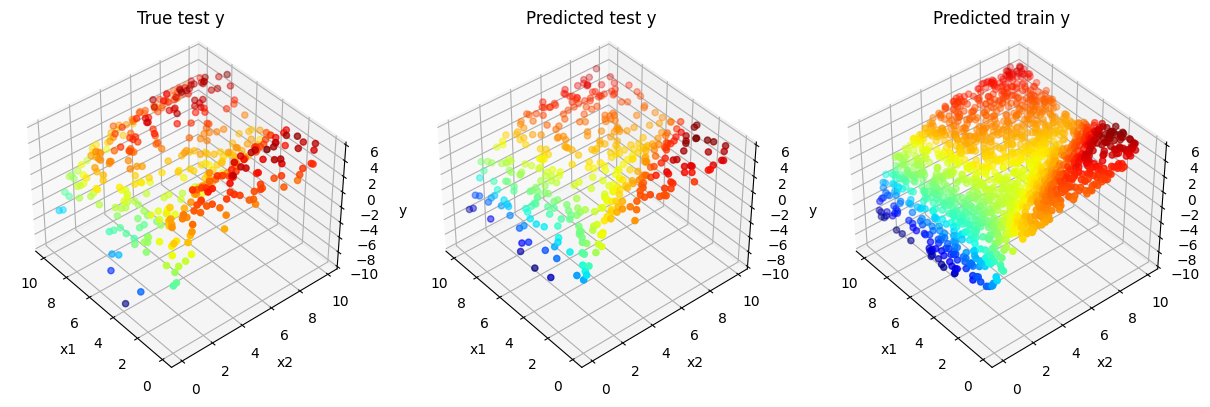

1600 tensor(1.5921, grad_fn=<MseLossBackward0>)


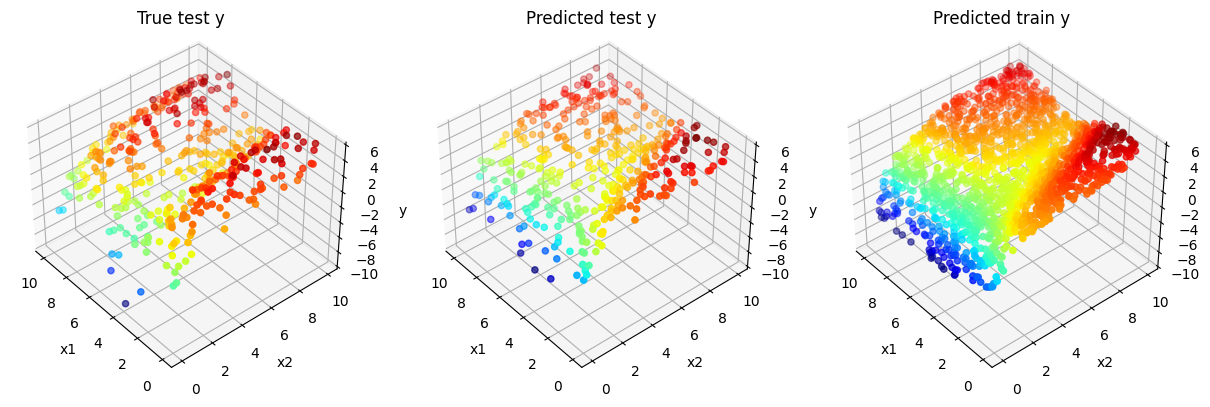

1800 tensor(1.5378, grad_fn=<MseLossBackward0>)


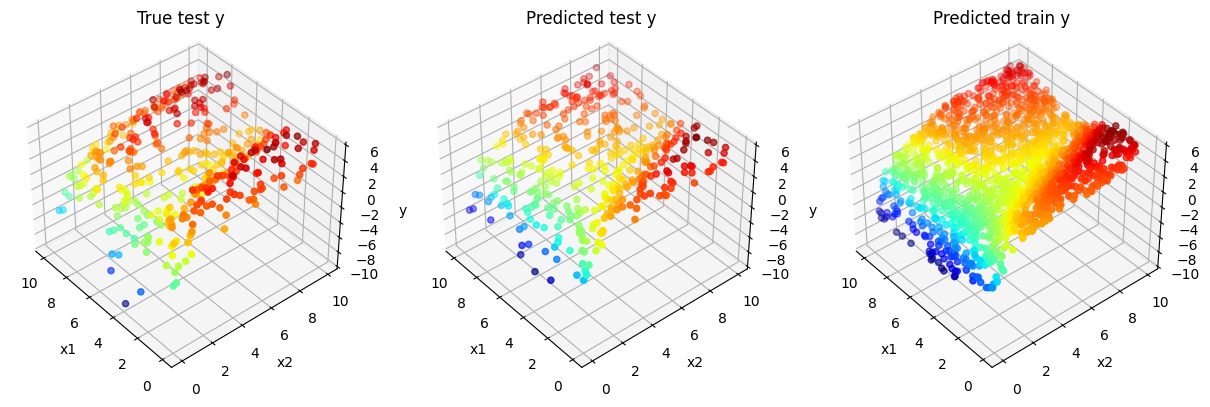

2000 tensor(1.4926, grad_fn=<MseLossBackward0>)


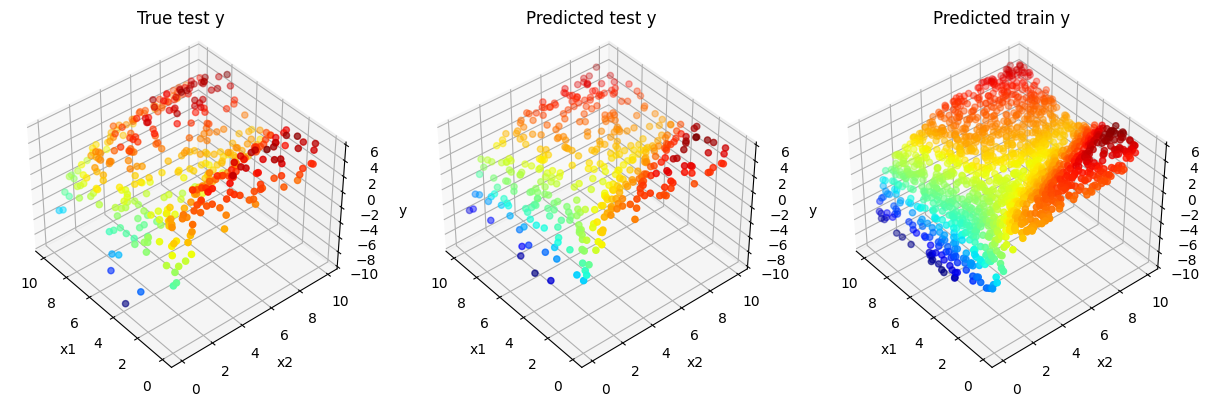

2200 tensor(1.4501, grad_fn=<MseLossBackward0>)


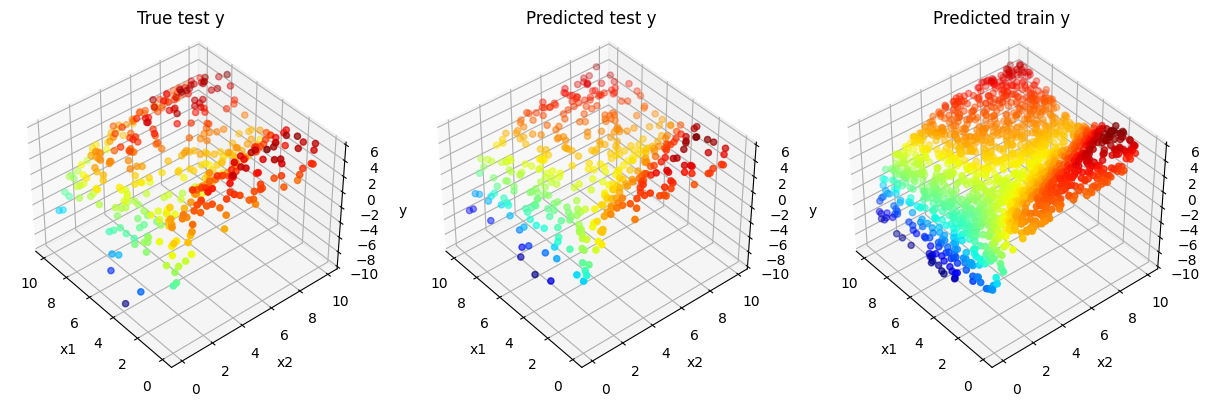

2400 tensor(1.4090, grad_fn=<MseLossBackward0>)


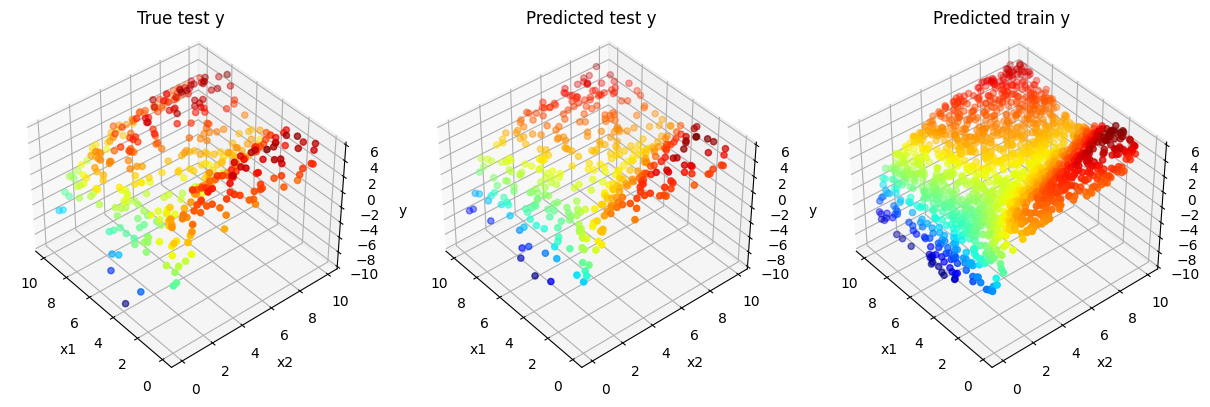

2600 tensor(1.3718, grad_fn=<MseLossBackward0>)


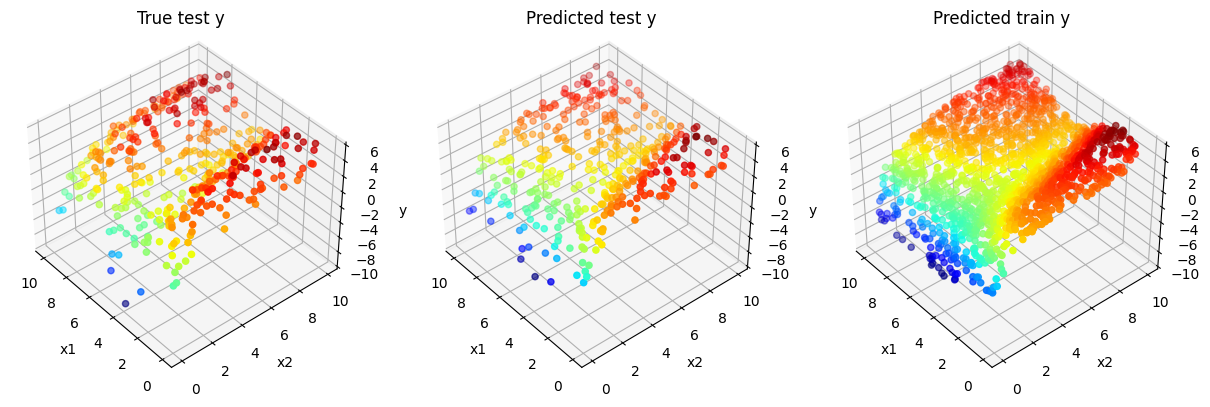

2800 tensor(1.3341, grad_fn=<MseLossBackward0>)


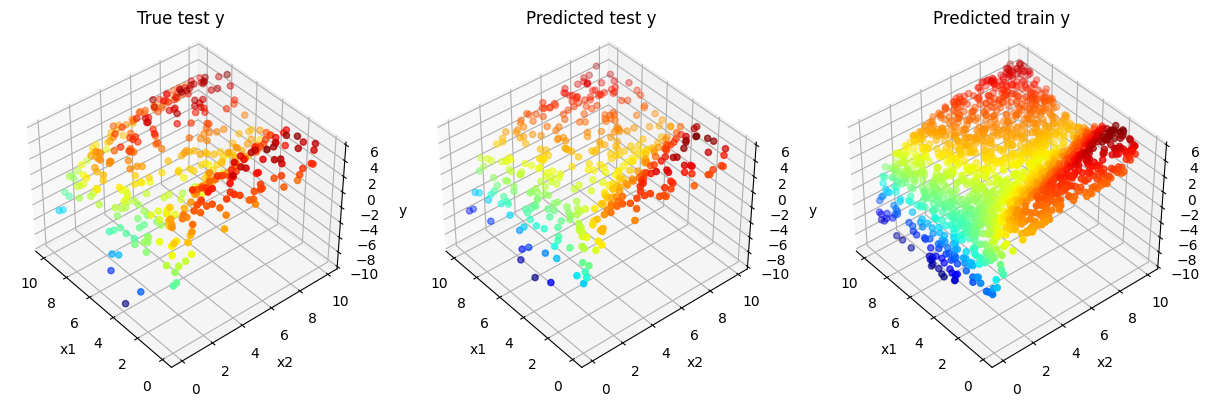

3000 tensor(1.2985, grad_fn=<MseLossBackward0>)


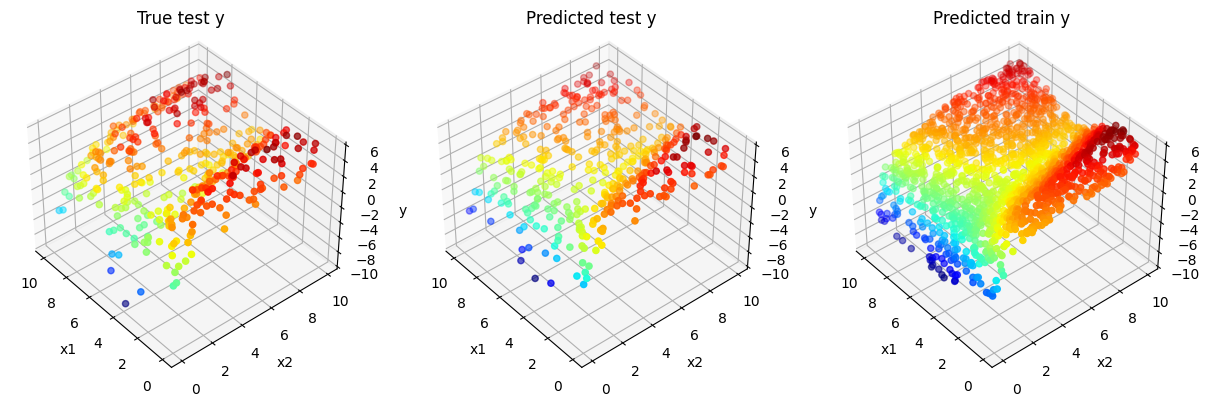

3200 tensor(1.2691, grad_fn=<MseLossBackward0>)


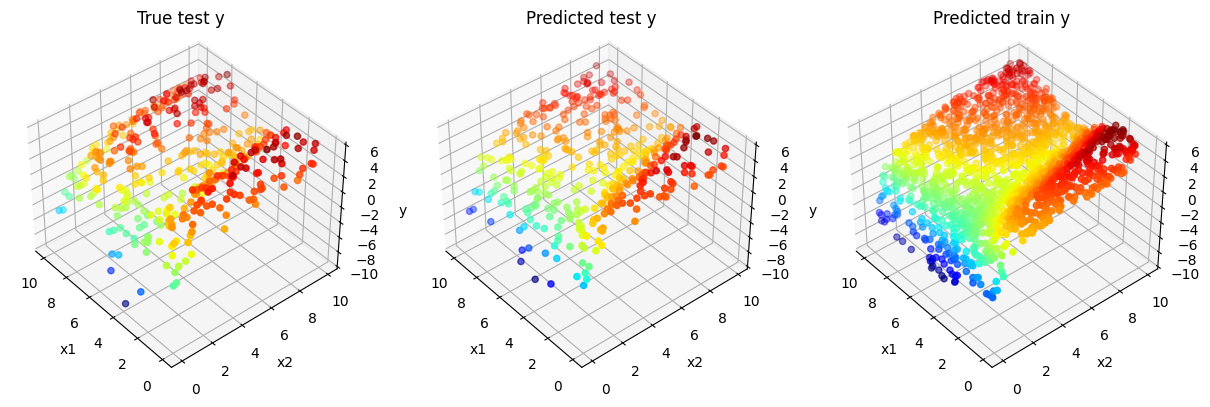

3400 tensor(1.2392, grad_fn=<MseLossBackward0>)


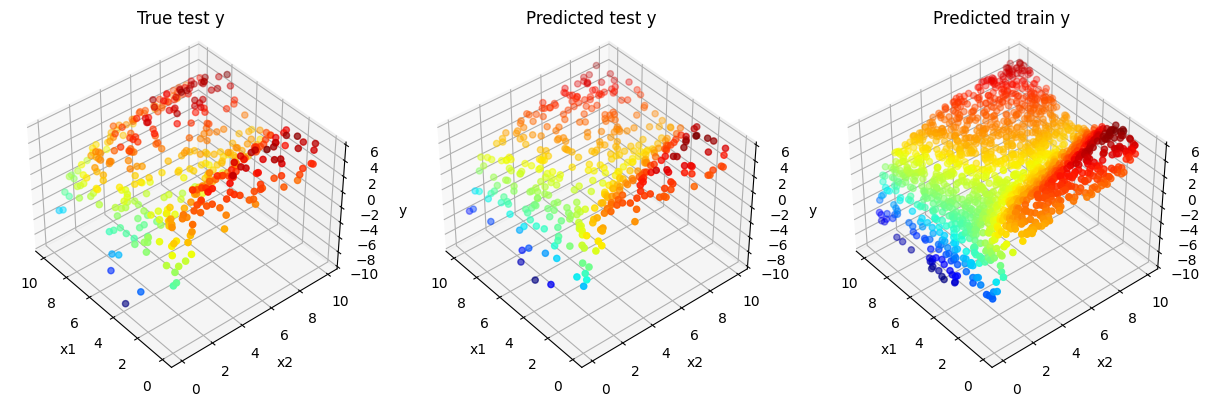

3600 tensor(1.2171, grad_fn=<MseLossBackward0>)


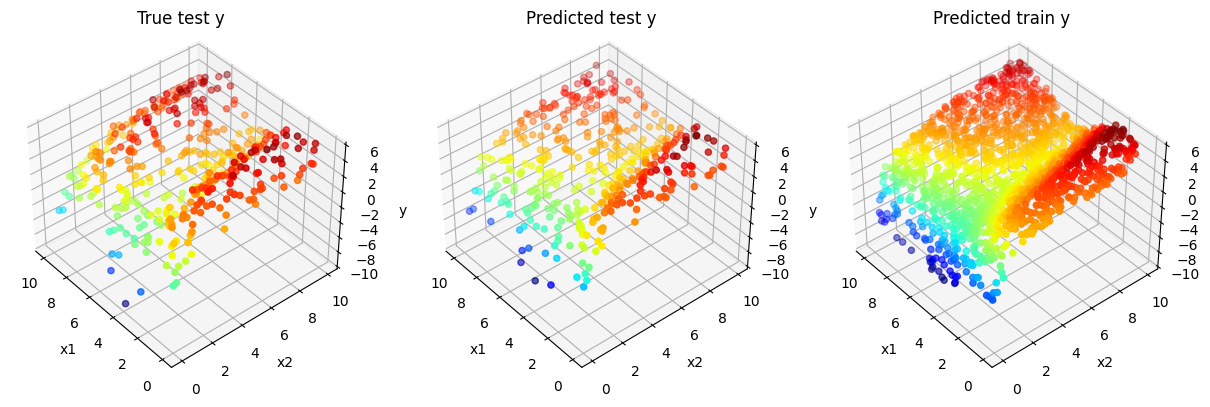

3800 tensor(1.2025, grad_fn=<MseLossBackward0>)


In [9]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

# 모델 생성
# model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

model = MLPModel()
print(f'{sum(p.numel() for p in model.parameters() if p.requires_grad)} Parameters')

# optimizer 생성
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

# 학습
list_epoch = []
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

epoch = 4000
for i in range(epoch):
  # Trian
  model.train()
  optimizer.zero_grad()

  input_x  = torch.Tensor(train_X)
  true_y = torch.Tensor(train_y)
  pred_y = model(input_x)

  loss = reg_loss(pred_y.squeeze(), true_y)
  loss.backward()
  optimizer.step()
  list_epoch.append(i)
  list_train_loss.append(loss.detach().numpy())

  # Validate
  model.eval()
  optimizer.zero_grad()
  input_x = torch.Tensor(val_X)
  true_y = torch.Tensor(val_y)
  pred_y = model(input_x)
  loss = reg_loss(pred_y.squeeze(), true_y)
  list_val_loss.append(loss.detach().numpy())

  if i % 200 == 0:
    # Test
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(test_X)
    true_y = torch.Tensor(test_y)
    pred_y = model(input_x).detach().numpy()
    mae = mean_absolute_error(true_y, pred_y)
    list_mae.append(mae)
    list_mae_epoch.append(i)

    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.set_zlim(-10, 6)
    ax1.view_init(40, -40)
    ax1.set_title('True test y')
    ax1.invert_xaxis()

    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_zlabel('y')
    ax2.set_zlim(-10, 6)
    ax2.view_init(40, -40)
    ax2.set_title('Predicted test y')
    ax2.invert_xaxis()

    input_x = torch.Tensor(train_X)
    pred_y = model(input_x).detach().numpy()

    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_zlabel('y')
    ax3.set_zlim(-10, 6)
    ax3.view_init(40, -40)
    ax3.set_title('Predicted train y')
    ax3.invert_xaxis()

    plt.show()
    print(f'epoch : {i}, mae = {mae}')

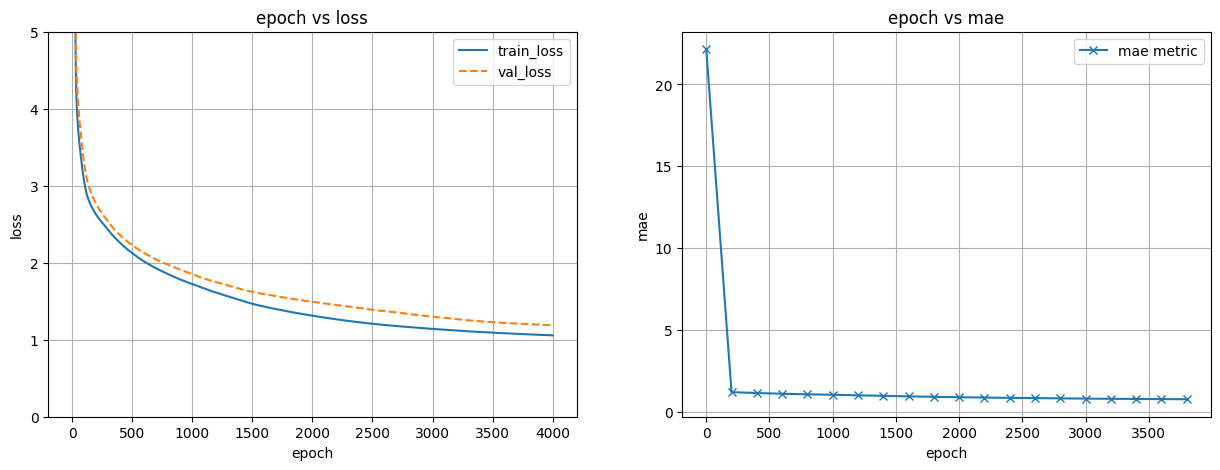

In [10]:
# 결과 출력
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')

plt.show()